<a href="https://colab.research.google.com/github/jmcava/jmcava/blob/main/Zona_414_dep_estadual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/votacao_candidato_414.csv'

# Carregar o arquivo com a codificação adequada e o separador correto
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Exibir as colunas para confirmação
print("Colunas disponíveis no arquivo:")
print(df.columns)

# Filtrar apenas os candidatos eleitos e reeleitos com base na situação de totalização
# Certifique-se de ajustar os valores de acordo com a nomenclatura do seu arquivo
df_eleitos = df[df['Situação totalização'].str.contains('Eleito', case=False, na=False)]

# Selecionar colunas relevantes
df_eleitos = df_eleitos[['Nome candidato', 'Partido','Votos nominais']]

# Ordenar por votos nominais de forma decrescente
df_eleitos_sorted = df_eleitos.sort_values(by='Votos nominais', ascending=False)

# Mostrar os primeiros registros para validação
print(df_eleitos_sorted.head())

# Salvar o resultado em um novo arquivo CSV
df_eleitos_sorted.to_csv('/content/candidatos_eleitos_414.csv', index=False, encoding='utf-8')


Colunas disponíveis no arquivo:
Index(['Ano de eleição', 'Cargo', 'Município', 'Nome candidato', 'Zona', 'UF',
       'Situação totalização', 'Partido', 'Votos nominais', 'Data de carga'],
      dtype='object')
                        Nome candidato    Partido  Votos nominais
1868             CARLA SARDANO MORANDO       PSDB           15660
414    LUIZ FERNANDO TEIXEIRA FERREIRA         PT            3888
276         TEONÍLIO MONTEIRO DA COSTA         PT            3533
587          EDUARDO MATARAZZO SUPLICY         PT            2352
743   ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1566


In [2]:
print(df_eleitos)

                       Nome candidato Partido  Votos nominais
13                 ADILSON DOS SANTOS    PSTU               2
21          BRUNA DIAS FURLAN VICENTE    PSDB              43
22                  ANALICE FERNANDES    PSDB               8
23            NELSON BOTELHO DA SILVA    PSTU               0
25     MARCIA APARECIDA OVEJANEDA LIA      PT              49
...                               ...     ...             ...
1919             WALTER RESENDE FILHO    PRTB              55
1920    NEIVA ANTONIA MARTINS MARQUES    PROS               0
1921            CAROLINA CASSACA NOEL    PROS               0
1922  CARLOS ALBERTO DE ZAGOTTIS SAAD    PROS               0
1923          MARCELO OLIVEIRA ROSADO     PTB               0

[784 rows x 3 columns]


In [3]:
print(df_eleitos)

                       Nome candidato Partido  Votos nominais
13                 ADILSON DOS SANTOS    PSTU               2
21          BRUNA DIAS FURLAN VICENTE    PSDB              43
22                  ANALICE FERNANDES    PSDB               8
23            NELSON BOTELHO DA SILVA    PSTU               0
25     MARCIA APARECIDA OVEJANEDA LIA      PT              49
...                               ...     ...             ...
1919             WALTER RESENDE FILHO    PRTB              55
1920    NEIVA ANTONIA MARTINS MARQUES    PROS               0
1921            CAROLINA CASSACA NOEL    PROS               0
1922  CARLOS ALBERTO DE ZAGOTTIS SAAD    PROS               0
1923          MARCELO OLIVEIRA ROSADO     PTB               0

[784 rows x 3 columns]


In [4]:
# Verifique os valores únicos na coluna de Situação totalização para identificar o termo correto
print(df['Situação totalização'].unique())

# Ajustar o filtro para incluir apenas candidatos eleitos
df_eleitos_corrigido = df[df['Situação totalização'].isin(['Eleito', 'Eleito por Média', 'Eleito por QP'])]

# Recontar o total de candidatos eleitos
total_eleitos_corrigido = len(df_eleitos_corrigido)
print(f"Total de candidatos eleitos: {total_eleitos_corrigido}")


['Suplente' 'Não Eleito' 'Eleito']
Total de candidatos eleitos: 94


In [5]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias e ordená-las
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado
print(df_final.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final.to_csv('/content/candidatos_eleitos_filtrados.csv', index=False, encoding='utf-8')


                       Nome candidato Partido  Votos nominais
21          BRUNA DIAS FURLAN VICENTE    PSDB              43
22                  ANALICE FERNANDES    PSDB               8
25     MARCIA APARECIDA OVEJANEDA LIA      PT              49
127         ROBERVAL CONTE LOPES LIMA      PL             391
147  GILDEVANIO ILSO DOS SANTOS DINIZ      PL             411


In [6]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Exibir as primeiras linhas do resultado ordenado
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados.csv', index=False, encoding='utf-8')


                        Nome candidato    Partido  Votos nominais
1868             CARLA SARDANO MORANDO       PSDB           15660
414    LUIZ FERNANDO TEIXEIRA FERREIRA         PT            3888
276         TEONÍLIO MONTEIRO DA COSTA         PT            3533
587          EDUARDO MATARAZZO SUPLICY         PT            2352
743   ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1566


In [7]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


                        Nome candidato    Partido  Votos nominais  Posição
1868             CARLA SARDANO MORANDO       PSDB           15660        1
414    LUIZ FERNANDO TEIXEIRA FERREIRA         PT            3888        2
276         TEONÍLIO MONTEIRO DA COSTA         PT            3533        3
587          EDUARDO MATARAZZO SUPLICY         PT            2352        4
743   ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1566        5


In [8]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Reorganizar as colunas para garantir que 'Posição' seja a primeira
df_final_sorted = df_final_sorted[['Posição', 'Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


      Posição                    Nome candidato    Partido  Votos nominais
1868        1             CARLA SARDANO MORANDO       PSDB           15660
414         2   LUIZ FERNANDO TEIXEIRA FERREIRA         PT            3888
276         3        TEONÍLIO MONTEIRO DA COSTA         PT            3533
587         4         EDUARDO MATARAZZO SUPLICY         PT            2352
743         5  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1566


In [9]:
# Exibir o índice das linhas do DataFrame final para ver de onde elas vêm
print(df_final_sorted.index)


Index([1868,  414,  276,  587,  743,  607, 1698,  435,  752, 1745,  482, 1746,
        569, 1274,  147,  127, 1119, 1828,  574, 1207,  274, 1009, 1373,  905,
       1075,  402, 1477,  154, 1067, 1759,  216,  638,  956, 1629, 1299,  656,
        464, 1272,  570,  323, 1331,  680,  209, 1355, 1109,  858, 1874, 1215,
         25, 1758, 1287,   21,  599,  153, 1223, 1889,  462, 1865, 1168,  473,
        148,  437,  383,  646, 1318, 1243, 1172,  456, 1174, 1048,  736, 1822,
       1342, 1873, 1570,  581,  639,  832,  854,   22,  588, 1576, 1170, 1643,
        714, 1534, 1818, 1554,  855,  808,  533,  214, 1637, 1244],
      dtype='int64')


In [10]:
# Exibir o índice das linhas do DataFrame final para ver de onde elas vêm
print(df_final_sorted.index)


Index([1868,  414,  276,  587,  743,  607, 1698,  435,  752, 1745,  482, 1746,
        569, 1274,  147,  127, 1119, 1828,  574, 1207,  274, 1009, 1373,  905,
       1075,  402, 1477,  154, 1067, 1759,  216,  638,  956, 1629, 1299,  656,
        464, 1272,  570,  323, 1331,  680,  209, 1355, 1109,  858, 1874, 1215,
         25, 1758, 1287,   21,  599,  153, 1223, 1889,  462, 1865, 1168,  473,
        148,  437,  383,  646, 1318, 1243, 1172,  456, 1174, 1048,  736, 1822,
       1342, 1873, 1570,  581,  639,  832,  854,   22,  588, 1576, 1170, 1643,
        714, 1534, 1818, 1554,  855,  808,  533,  214, 1637, 1244],
      dtype='int64')


In [11]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                         Nome candidato       Partido  Votos nominais
       1                  CARLA SARDANO MORANDO          PSDB           15660
       2        LUIZ FERNANDO TEIXEIRA FERREIRA            PT            3888
       3             TEONÍLIO MONTEIRO DA COSTA            PT            3533
       4              EDUARDO MATARAZZO SUPLICY            PT            2352
       5       ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA            1566
       6              ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1033
       7                 PAULA NUNES DOS SANTOS          PSOL             813
       8                            TOME ABDUCH  REPUBLICANOS             778
       9                CARLOS ALBERTO GIANNASI          PSOL             675
      10                 BRUNO ZAMBELLI SALGADO            PL             618
      11             EDIANE MARIA DO NASCIMENTO          PSOL             565
      12                  THIAGO REIS AURICCHIO            PL   

In [12]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                         Nome candidato       Partido  Votos nominais
       1                  CARLA SARDANO MORANDO          PSDB           15660
       2        LUIZ FERNANDO TEIXEIRA FERREIRA            PT            3888
       3             TEONÍLIO MONTEIRO DA COSTA            PT            3533
       4              EDUARDO MATARAZZO SUPLICY            PT            2352
       5       ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA            1566
       6              ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1033
       7                 PAULA NUNES DOS SANTOS          PSOL             813
       8                            TOME ABDUCH  REPUBLICANOS             778
       9                CARLOS ALBERTO GIANNASI          PSOL             675
      10                 BRUNO ZAMBELLI SALGADO            PL             618
      11             EDIANE MARIA DO NASCIMENTO          PSOL             565
      12                  THIAGO REIS AURICCHIO            PL   

In [13]:
!pip install matplotlib

Codificação detectada: ISO-8859-1


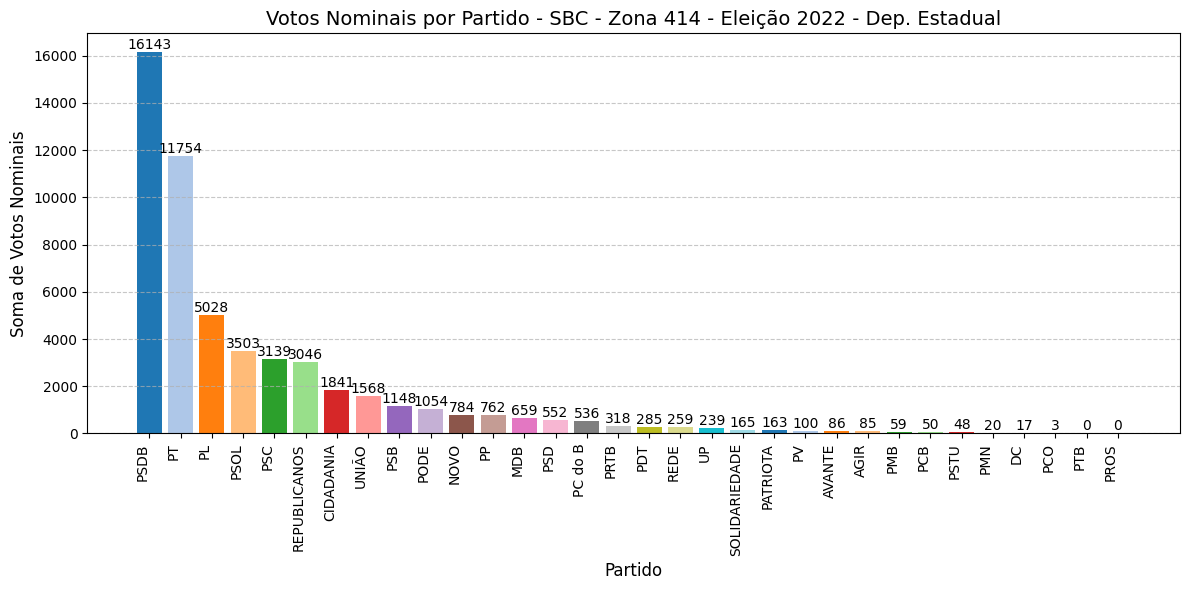

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Detecta a codificação
with open("/content/votacao_candidato_414.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

print(f"Codificação detectada: {result['encoding']}")

# Carrega o CSV com a codificação e o separador corretos
df_414 = pd.read_csv("/content/votacao_candidato_414.csv", encoding=result['encoding'], sep=";")

# Agrupa por partido e soma os votos nominais
df_agregado_414 = df_414.groupby('Partido')['Votos nominais'].sum().reset_index()

# Ordena os dados para o gráfico (opcional, mas recomendado)
df_agregado_414 = df_agregado_414.sort_values('Votos nominais', ascending=False)



# Cria o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(df_agregado_414['Partido'], df_agregado_414['Votos nominais'], color=plt.colormaps['tab20'].colors)

plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos Nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 414 - Eleição 2022 - Dep. Estadual', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')


plt.show()